In [1]:
from lib import draw_examples, make_test, run_test
import torch
import numpy as np
from torchtyping import TensorType as TT
tensor = torch.tensor

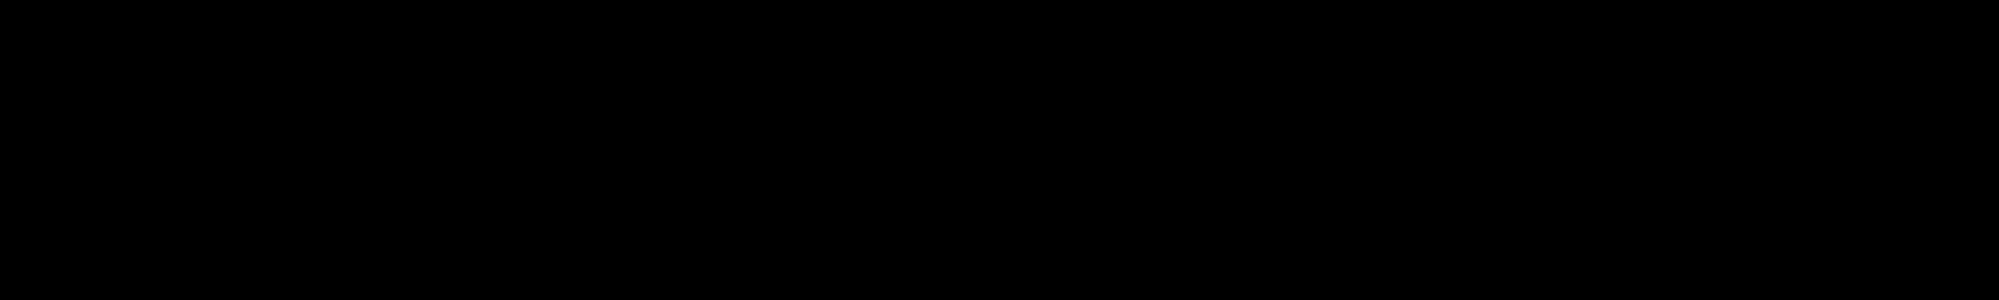

In [4]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return torch.tensor(range(i))

draw_examples("arange", [{"" : arange(i)} for i in [5, 3, 9]])

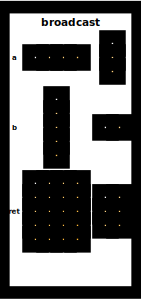

In [3]:
# Example of broadcasting.
examples = [(arange(4), arange(5)[:, None]) ,
            (arange(3)[:, None], arange(2))]
draw_examples("broadcast", [{"a": a, "b":b, "ret": a + b} for a, b in examples])

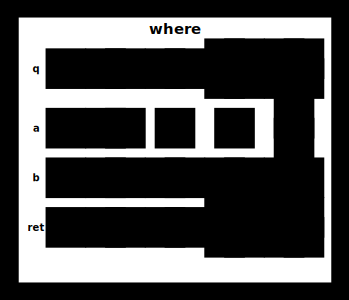

In [5]:
def where(q, a, b):
    "Use this function to replace an if-statement."
    return (q * a) + (~q) * b

# In diagrams, orange is positive/True, where is zero/False, and blue is negative.

examples = [(tensor([False]), tensor([10]), tensor([0])),
            (tensor([False, True]), tensor([1, 1]), tensor([-10, 0])),
            (tensor([False, True]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([[0], [10]]), tensor([-10, 0])),
           ]
draw_examples("where", [{"q": q, "a":a, "b":b, "ret": where(q, a, b)} for q, a, b in examples])

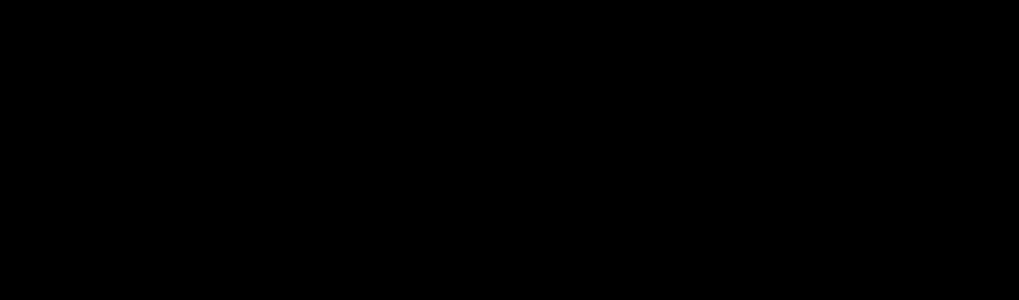

In [23]:
# Puzzle 1 - ones

def ones_spec(out):
  for i in range(len(out)):
    out[i] = 1
        
def ones(i: int) -> TT["i"]:
  return where(arange(i) >= 0, 1, 0)

test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [ ]:
run_test(test_ones)

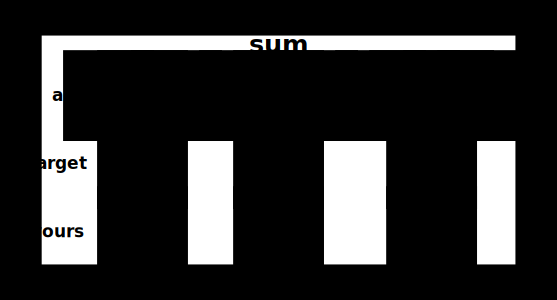

In [163]:
# Puzzle 2 - sum

def sum_spec(a, out):
  out[0] = 0
  for i in range(len(a)):
    out[0] += a[i]
        
def sum(a: TT["i"]) -> TT[1]:
  return ones(a.shape[0]) @ a[:, None]

test_sum = make_test("sum", sum, sum_spec)

In [ ]:
run_test(test_sum)

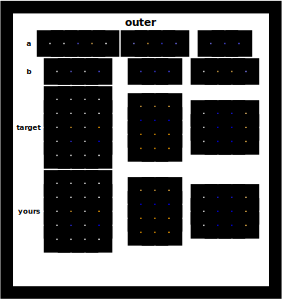

In [179]:
# Puzzle 3 - outer

def outer_spec(a, b, out):
  for i in range(len(out)):
    for j in range(len(out[0])):
        out[i][j] = a[i] * b[j]
            
def outer(a: TT["i"], b: TT["j"]) -> TT["i", "j"]:
  return a[:, None] * b
    
test_outer = make_test("outer", outer, outer_spec)

In [ ]:
run_test(test_outer)

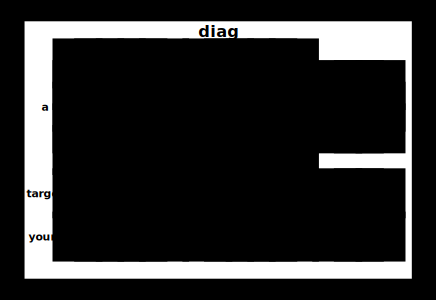

In [246]:
# Puzzle 4 - diag

def diag_spec(a, out):
  for i in range(len(a)):
    out[i] = a[i][i]
        
def diag(a: TT["i", "i"]) -> TT["i"]:
  # both are correct
  #return where(arange(a.shape[0]) - arange(a.shape[0])[:, None] == 0, a, 0) @ ones(a.shape[0])
  return a[arange(a.shape[0]), arange(a.shape[0])]

test_diag = make_test("diag", diag, diag_spec)

In [ ]:
run_test(test_diag)